# Wavelets


* [Пакет для Julia](https://github.com/JuliaDSP/Wavelets.jl)
* [Intro](https://mirznanii.com/a/314255/veyvlet-analiz-signalov-i-ego-primenenie)
* [Book](https://docviewer.yandex.ru/view/326904132/?page=9&*=fsWuIS0ydgQPlSfjfP3ugstOO297InVybCI6Imh0dHA6Ly9pbmlzLmppbnIucnUvc2wvdm9sMi9hcmNoaXZlL2xld2FsbGV3YXZlbGV0cy5wZGYiLCJ0aXRsZSI6Imxld2FsbGV3YXZlbGV0cy5wZGYiLCJub2lmcmFtZSI6dHJ1ZSwidWlkIjoiMzI2OTA0MTMyIiwidHMiOjE1Njg5MjE3NzUwNzcsInl1IjoiMTI2OTg0ODEzMTU2NzI0MTg1NyIsInNlcnBQYXJhbXMiOiJsYW5nPXJ1JnRtPTE1Njg5MjE3NDUmdGxkPXJ1Jm5hbWU9bGV3YWxsZXdhdmVsZXRzLnBkZiZ0ZXh0PSVEMCVCMiVEMCVCNSVEMCVCOSVEMCVCMiVEMCVCQiVEMCVCNSVEMSU4MislRDAlQjAlRDAlQkQlRDAlQjAlRDAlQkIlRDAlQjglRDAlQjcrJUQwJUJGJUQwJUJFJUQwJUI4JUQxJTgxJUQwJUJBKyVEMSU4NyVEMCVCMCVEMSU4MSVEMSU4MiVEMCVCRSVEMSU4MiVEMSU4QiZ1cmw9aHR0cCUzQS8vaW5pcy5qaW5yLnJ1L3NsL3ZvbDIvYXJjaGl2ZS9sZXdhbGxld2F2ZWxldHMucGRmJmxyPTM4Jm1pbWU9cGRmJmwxMG49cnUmc2lnbj0yMDZjYzc5NzEwNjc5Y2VlN2ZmN2NmYTk4M2MyMDEzNyZrZXlubz0wIn0%3D&lang=ru)
* [Tutorial Habr](https://habr.com/ru/post/451278/)
* [Compression](https://habr.com/ru/post/168517/)



In [1]:
using Plots

Тот же набор тестовых функций, что использовался для примеров для БПФ

In [2]:
y1(x) = U1*sin(w1*x)
y2(x) = U1*sin(w1*x) + U2*sin(w2*x)
y3(x) = U1*sin(w1*x).*( 1.0 + tanh(μ*x) ) + U2*sin(w2*x).*(1.0-tanh(μ*x) )
y4(x) = sin(250pi*x^2)

X = range(0,  1,  length = 2048) |> collect
x1 = range(0,  180,  length = 512) |> collect;

U1 = 1.0
U2 = 1.0
T1 = 50
T2 = 10
μ = 0.01

w1 = 2pi/T1
w2 = 2pi/T2

Y1 = y1.(x1)
Y2 = y2.(x1)
Y3 = y3.(x1)
Y4 = y4.(X)

w1, w2

(0.12566370614359174, 0.6283185307179586)

### Непрерывные вейвлет преобразования

In [3]:
# Антисимметричный вейвлет
wave(x) = x*exp(-0.5x^2)
# mexican hat
mhat(x) = (x^2 - 1)*exp(-0.5*x^2)
# difference of Gaussian
doga(x) = exp(-0.5x^2) - 0.5exp(-0.125x^2)
# Littlewood-Paley
lpwt(x) = 1/(pi*x)*(sin(2pi*x) - sin(pi*x))

function W(a, b, wt, fun, N)

    # вейвлет спектр
    psi(x) = 1.0/sqrt(a) * wt( (x-b)/a ) * fun(x)

    # метод Симсона для интеграла
    function sims(a, b, N)

        st = (b - a)/N;
        s1 = 0.
        s2 = 0.
        for i = 1:2:N-1
            s1 = s1 + psi(a + i*st)
            s2 = s2 + psi(a + (i+1)*st)
        end

        st*( psi(a)-psi(b) + 4*s1 + 2*s2 )/3.0
    end
    # quadgk(polinom, 0, 2, rtol=1e-3)
    # метод трапеций
    function trap(a, b, N)
        st = (b - a)/N;

        s = sum(i->psi(a+i*st), 1:N-1)

        0.5st*(2s + psi(a) + psi(b) )
    end

    trap(-N, N, 500)
end

Wt(fun, wt) = [ W(a, b, wt, fun, 256) for a in 1:40, b in 1:100 ]

Wt (generic function with 1 method)

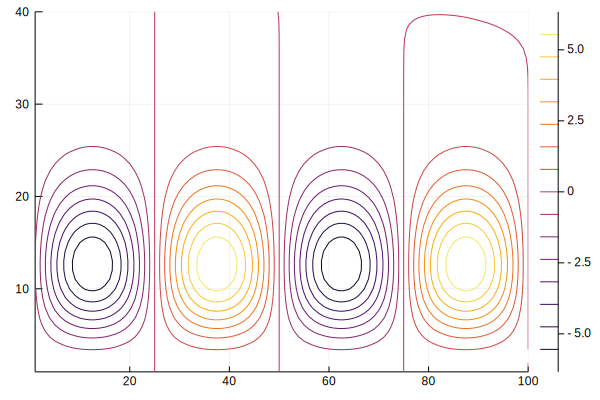

In [4]:
Wt1 = Wt(y1, mhat);

contour(Wt1)

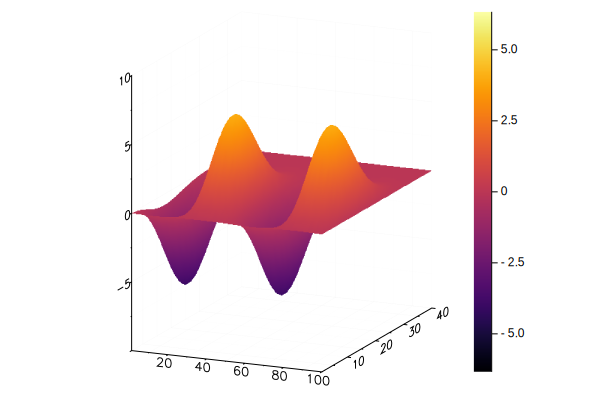

In [5]:
surface(Wt1)

Опробуем разные вейвлеты:

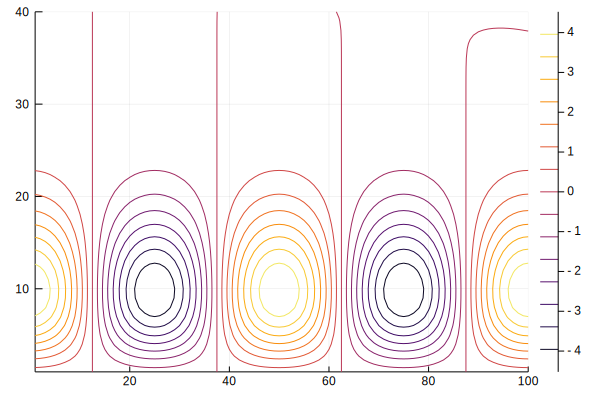

In [6]:
Wt1b = Wt(y1, wave);

contour(Wt1b)

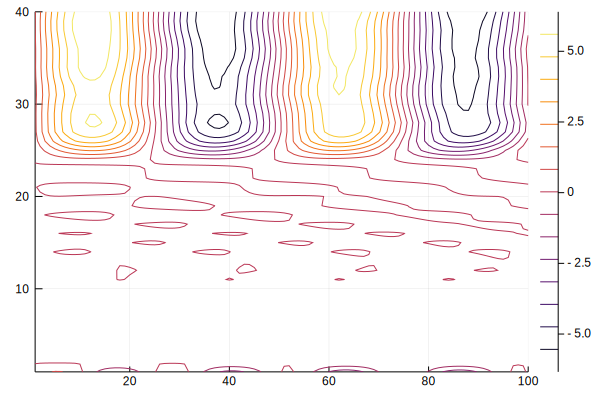

In [7]:
Wt1c = Wt(y1, lpwt);

contour(Wt1c)

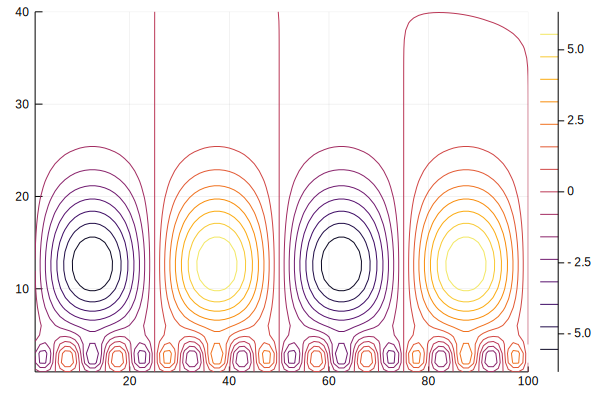

In [10]:
Wt2 = Wt(y2, mhat);

contour(Wt2)

Крупные максимумы и минимумы соответствуют низкочастотной горманике, а локальные экстремумы в нижней части (в области малых значений анализируемого сигнала) - высокочастотным.

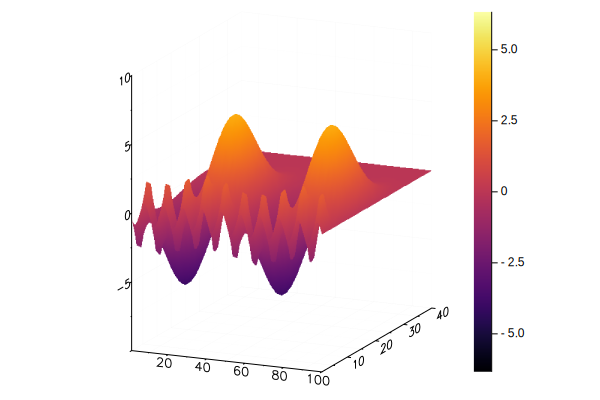

In [11]:
surface(Wt2)

### Дискретные вейвлет преобразования

Непонятно как отсюда выудить полезную информацию

In [12]:
using Wavelets

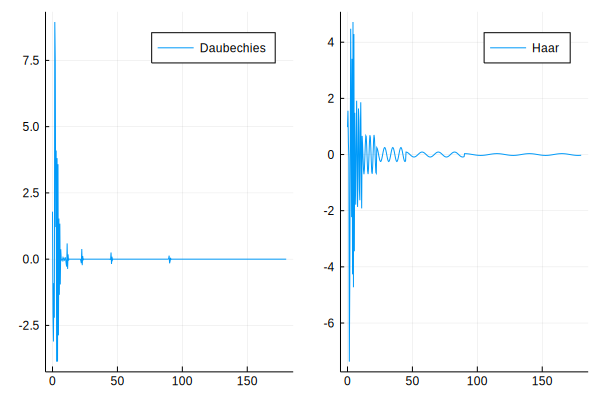

In [35]:
Y1w = dwt(Y1, wavelet(WT.db8));
Y1w_b = dwt(Y1, wavelet(WT.haar, WT.Filter, WT.Periodic), 8);

plot([x1, x1], [Y1w, Y1w_b], layout = 2, lab = ["Daubechies" "Haar"] )

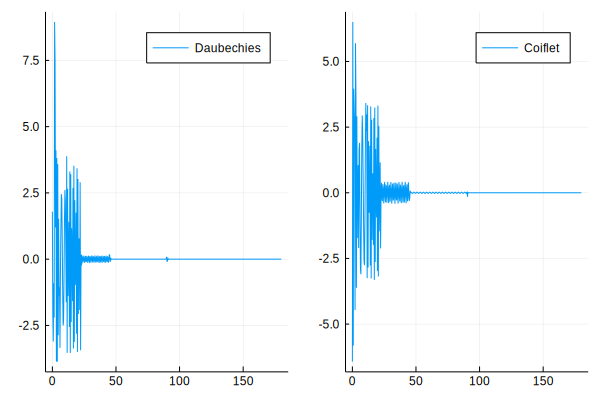

In [52]:
Y2w = dwt(Y2, wavelet(WT.db8));
Y2w_b = dwt(Y2, wavelet(WT.coif4, WT.Filter, WT.Periodic), 6);

plot([x1, x1], [Y2w, Y2w_b], layout = 2, lab = ["Daubechies" "Coiflet"] )

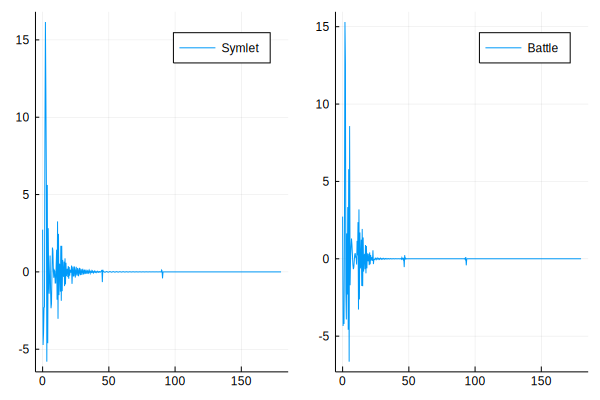

In [24]:
Y3w = dwt(Y3, wavelet(WT.sym4));
Y3w_b = dwt(Y3, wavelet(WT.batt4, WT.Filter, WT.Periodic) );

plot([x1, x1], [Y3w, Y3w_b], layout = 2, lab = ["Symlet" "Battle"] )

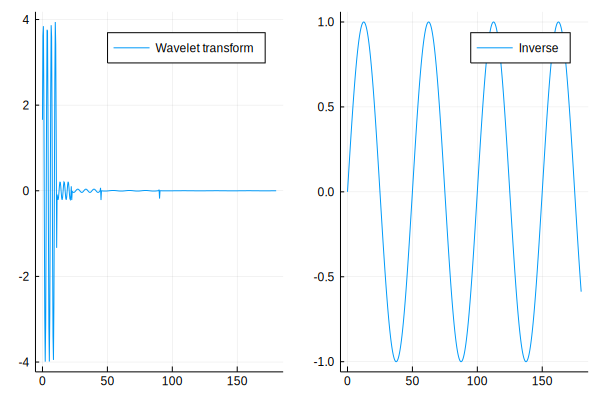

In [26]:
wt = wavelet(WT.db2)
yw = dwt(Y1, wt, 4)
# inverse tranform
ywi = idwt(yw, wt, 4);
plot([x1, x1], [yw, ywi], layout = 2, lab = ["Wavelet transform" "Inverse"] )

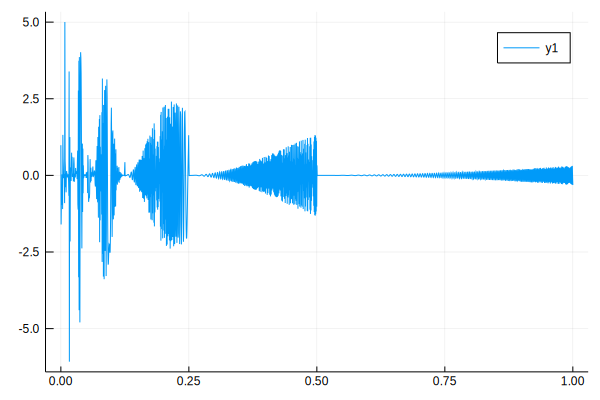

In [17]:
wt = wavelet(WT.Coiflet{2}(), WT.Filter, WT.Periodic)
yw4 = dwt(Y4, wt);
plot(X, yw4)

Подавление шумов

In [29]:
n = 2^11;
x0 = testfunction(n,"Doppler")
x = x0 + 0.05*randn(n)
y = denoise(x, TI=true);

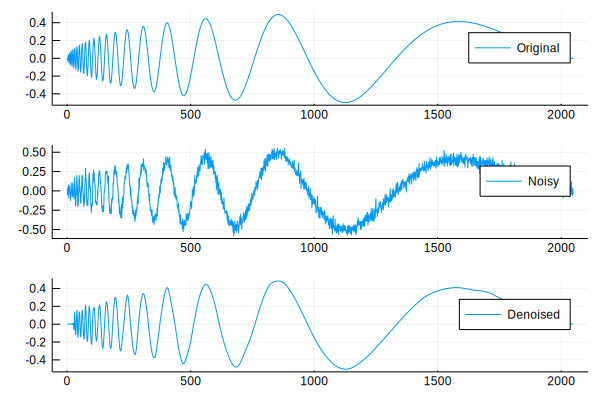

In [30]:
p1 = plot(x0, lab = "Original")
p2 = plot(x,  lab = "Noisy")
p3 = plot(y,  lab = "Denoised")
plot(p1, p2, p3, layout = (3,1))